<a href="https://colab.research.google.com/github/Amrmoslim/Machine-Learning/blob/master/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pf

## The Assumptions Question: 

* What Prefered method of Payment for Senior and non senior citizens
* What is the most important factor affecting customer Churn?
* Who is paying more based on customer dependancy?
* What is the most important factor affecting the customer Total Charges?


In [2]:
df = pd.read_csv(f'/content/drive/MyDrive/Udacity/Telco_Customer_Churn/WAFnUseCTelcoCustomer_Churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Exploration

In [3]:
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4295,3740-RLMVT,Male,1,Yes,No,67,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Bank transfer (automatic),60.95,4119.4,No
2291,7488-MXJIV,Female,0,No,No,4,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,85.65,321.65,Yes
2175,7927-AUXBZ,Female,0,No,No,30,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,No,Electronic check,85.15,2555.9,Yes
3473,7599-FKVXZ,Male,0,Yes,No,42,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),106.15,4512.7,Yes
5539,4632-PAOYU,Male,0,Yes,Yes,22,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.95,433.5,No
3620,9373-WSLOY,Male,1,Yes,No,33,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,No,Month-to-month,Yes,Electronic check,50.00,1750.85,No
6097,9114-DPSIA,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),81.00,5750,No
6811,8992-JQYUN,Male,0,Yes,No,1,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,50.35,50.35,Yes
827,9146-JRIOX,Female,0,Yes,Yes,14,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,25.55,372.45,No
594,9244-ZVAPM,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,45.60,45.6,No


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


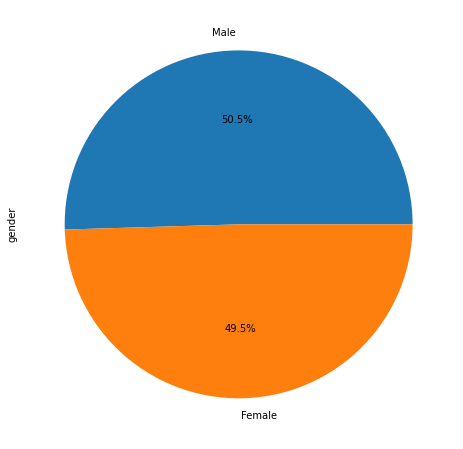

In [5]:
# 
df['gender'].value_counts().plot(kind= 'pie', figsize = (8,8),autopct='%1.1f%%' );

In [6]:
# Check Null values 
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# Check Duplicates 

print('Is there any Duplicated Customer:', df.customerID.duplicated().any() )

Is there any Duplicated Customer: False


In [8]:
print('Is there any Duplicates in the data frame:', df.duplicated().any())

Is there any Duplicates in the data frame: False


## What Prefered method of Payment for Senior and non senior citizens

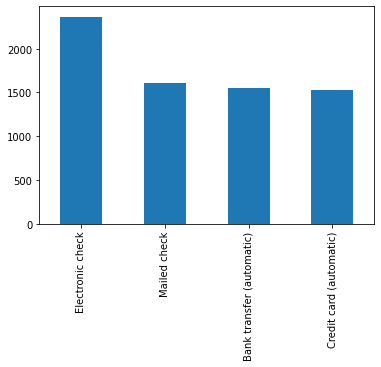

In [9]:
df['PaymentMethod'].value_counts().plot(kind = 'bar')

In [10]:
# Number of SeniorCitizens

print('Total Number of Senior Citizen subsribed :', df[(df["SeniorCitizen"]== 1)].shape[0])

Total Number of Senior Citizen subsribed : 1142


In [11]:
df[df['SeniorCitizen']==0].PaymentMethod.value_counts() # nonSenior

Electronic check             1771
Mailed check                 1518
Bank transfer (automatic)    1311
Credit card (automatic)      1301
Name: PaymentMethod, dtype: int64

In [12]:
df[df['SeniorCitizen']==1].PaymentMethod.value_counts() # Senior

Electronic check             594
Bank transfer (automatic)    233
Credit card (automatic)      221
Mailed check                  94
Name: PaymentMethod, dtype: int64

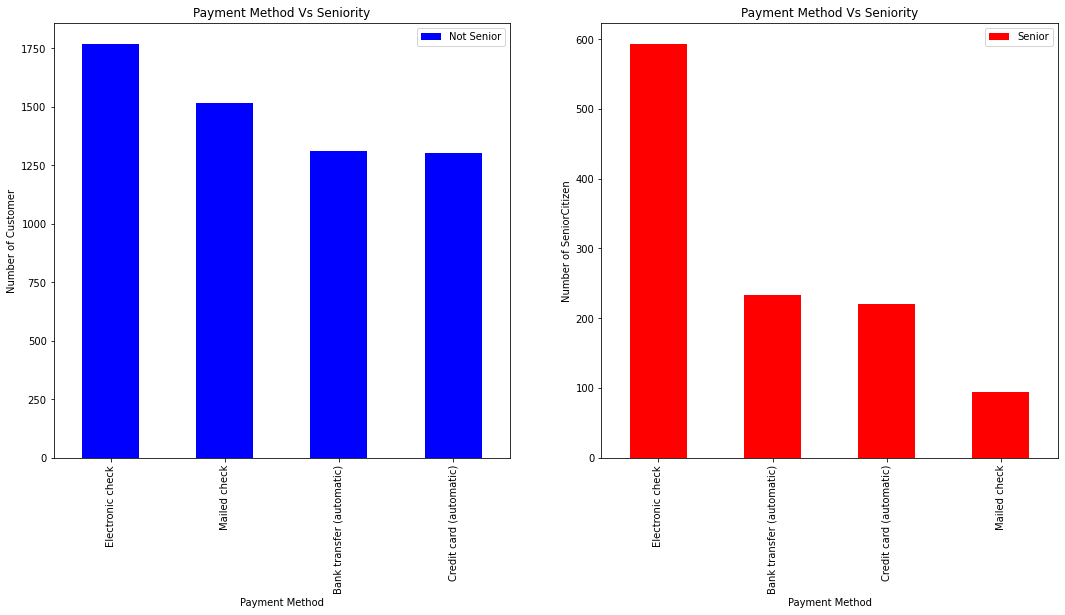

In [13]:
#fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(20,15))

plt.subplot(1,2,1)
df[df['SeniorCitizen']==0].PaymentMethod.value_counts().plot(kind='bar', label='Not Senior', color='b', figsize=(18,8))
#df[df['SeniorCitizen']==1].PaymentMethod.value_counts().plot(kind='bar', alpha=0.5, label='Senior', color='r', figsize=(8,8))
plt.xlabel('Payment Method')
plt.ylabel('Number of Customer')
plt.title('Payment Method Vs Seniority')
plt.legend()


plt.subplot(1,2,2)
#df[df['SeniorCitizen']==0].PaymentMethod.value_counts().plot(kind='bar', alpha=0.5, label='Not Senior', color='b', figsize=(8,8))
df[df['SeniorCitizen']==1].PaymentMethod.value_counts().plot(kind='bar', label='Senior', color='r', figsize=(18,8))
plt.xlabel('Payment Method')
plt.ylabel('Number of SeniorCitizen')
plt.title('Payment Method Vs Seniority')
plt.legend()
plt.show();



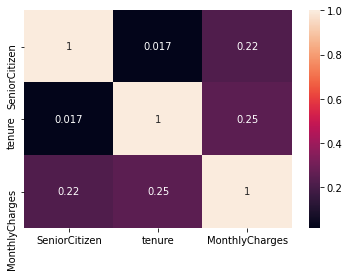

In [14]:
sns.heatmap(df.corr(), annot= True)

In [15]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [16]:
df_Churn_Yes = df[df['Churn']=='Yes'] # Customers left the subscribtion

In [17]:
df_Churn_No = df[df['Churn']=='No'] # Customers stayed with the company

In [18]:
print('Precentage of the custmers left the subscribtion: ',df_Churn_Yes.shape[0]/df.shape[0] *100, '%')

Precentage of the custmers left the subscribtion:  26.536987079369588 %


In [19]:
df_Churn_Yes.Contract.value_counts()/df_Churn_Yes.shape[0]*100

Month-to-month    88.550027
One year           8.881755
Two year           2.568218
Name: Contract, dtype: float64

In [20]:
df_Churn_No.Contract.value_counts()/df_Churn_No.shape[0]*100

Month-to-month    42.906842
Two year          31.832238
One year          25.260920
Name: Contract, dtype: float64

# A/B Testing

In [21]:
# Hypothesis testing 
# Mean value of the customers with phoneservice is Null Value 
# Mean value of the customers without phone service 

# Cusotmers with Phone services is more loyal than the customers without Phone service 

In [22]:
# convert churn column to binary values (get dummies) for Churn column
df_new = pd.get_dummies(df, columns=["Churn"])

In [23]:
df_new.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_No,Churn_Yes
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,1,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,1,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,1


In [24]:
df_new.drop('Churn_No', inplace=True, axis= 1)

In [25]:
df_new.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_Yes
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [26]:
# Data set Churn mean
Churn_Mean = df_new.Churn_Yes.mean()
print(Churn_Mean)

0.2653698707936959


<br>
<center>
$H_{0}$ ---&gt; $p_{no}$ - $p_{yes}$ &lt;= 0 <br>
$H_{1}$ ---&gt; $p_{no}$ - $p_{yes}$ &gt; 0


In [41]:
Actual_Yes = df_new[df_new['PhoneService'] == 'Yes'].Churn_Yes.mean() # Mean Value of customer with phone service
print(Actual_Yes)

0.2670963684955196


In [42]:
Actual_No = df_new[df_new['PhoneService'] == 'No'].Churn_Yes.mean() # Mean Value of customer without phone service
print(Actual_No)

0.24926686217008798


In [44]:
Actual_diff = Actual_Yes - Actual_No
print(Actual_diff)

0.01782950632543162


In [29]:
C_Phoneservice_Yes = df_new[df_new['PhoneService'] == 'Yes'].shape[0]
print(C_Phoneservice_Yes)

6361


In [30]:
C_Phoneservice_No = df_new[df_new['PhoneService'] == 'No'].shape[0]
print(C_Phoneservice_No)

682


In [31]:
np.random.seed(42)

In [32]:
#probability of churn of customers with phone service @ random choice 
X = np.random.choice(df_new.Churn_Yes, C_Phoneservice_Yes,replace= True ).mean()
print(X)

0.25813551328407486


In [33]:
#probability of churn of customers with/out phone service @ random choice 
Y = np.random.choice(df_new.Churn_Yes, C_Phoneservice_No,replace= True ).mean()
print(Y)

0.2829912023460411


In [34]:
# Difference 
difference  = X-Y
print(difference)

-0.024855689061966224


##Verification

In [35]:
#probability of churn of customers with phone service @ random choice 

p_diffs = []
for _ in range(10000):
    bootsamp = df_new.sample(10000, replace = True)
    yes = bootsamp[bootsamp['PhoneService'] == 'Yes']['Churn_Yes'].mean()
    no = bootsamp[bootsamp['PhoneService'] == 'No']['Churn_Yes'].mean()
    diff = yes - no
    p_diffs.append(diff)



In [36]:
yes = np.random.binomial(C_Phoneservice_Yes, X, 10000)/C_Phoneservice_Yes
no = np.random.binomial(C_Phoneservice_No, Y, 10000)/C_Phoneservice_No
p_diffs_1 = yes - no



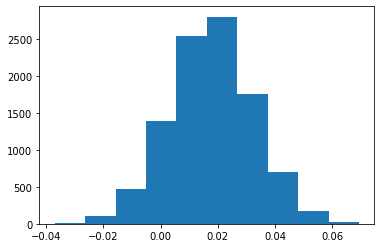

In [40]:
p_diffs = np.array(p_diffs)

plt.hist(p_diffs)
plt;


In [46]:
(p_diffs > Actual_diff).mean()


0.4967

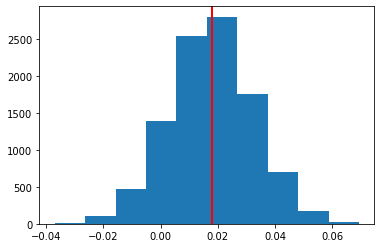

In [48]:
plt.hist(p_diffs);
plt.axvline(Actual_diff,c='r',linewidth = 2);


### As a conclusion, Phone service is not the main cause of the churn within the dataset